In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import telecom dataset into a pandas data frame
df = pd.read_csv('/content/gdrive/MyDrive/TelcoCustomerChurn.csv')
#seeing what columns are there in dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# checking unique values of each column
for col in df.columns:
    print(col, ":")
    print(df[col].unique())
    print("---------------")



customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---------------
gender :
['Female' 'Male']
---------------
SeniorCitizen :
[0 1]
---------------
Partner :
['Yes' 'No']
---------------
Dependents :
['No' 'Yes']
---------------
tenure :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
---------------
PhoneService :
['No' 'Yes']
---------------
MultipleLines :
['No phone service' 'No' 'Yes']
---------------
InternetService :
['DSL' 'Fiber optic' 'No']
---------------
OnlineSecurity :
['No' 'Yes' 'No internet service']
---------------
OnlineBackup :
['Yes' 'No' 'No internet service']
---------------
DeviceProtection :
['No' 'Yes' 'No internet service']
---------------
TechSupport :
['No' 'Yes' 'No internet service']
---------------
StreamingTV :
['No' 'Yes' 'No interne

In [5]:
#Exploratory Data Analysis & Data Cleaning

#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# we see that the total charges data type is object. Now we need to convert it into numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
#since we have converted the data type above now we will check for null valuess in TtalCharges Column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
#Drop the rows with TotalCharges value is NUll
df.dropna(inplace=True)

In [11]:
# Drop the customerID column from the data because it doesn't tell whether the customer will churn or not
df.drop(columns='customerID', inplace=True)

In [12]:
# Checking the unique values of the PaymentMethod 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
#We remove the (automatic) from PaymentMethod and replace it with ""
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)


In [14]:
# Checking the unique values of the PaymentMethod 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

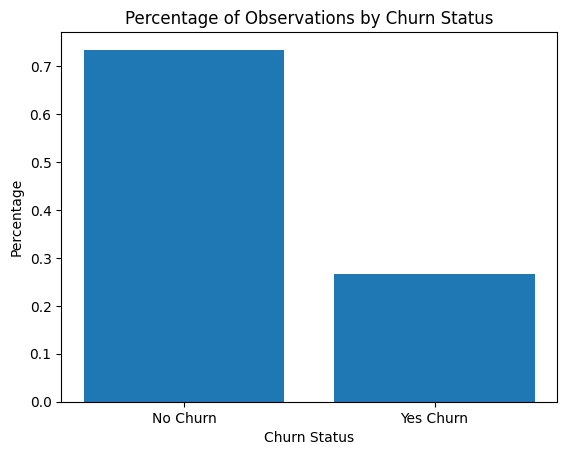

In [15]:
#Data Visualization
# Get the percentage of observations that correspond to each class of the response variable
no_churn_percentage = df['Churn'].value_counts()['No'] / len(df)
yes_churn_percentage = df['Churn'].value_counts()['Yes'] / len(df)

# Create a bar plot
plt.bar(['No Churn', 'Yes Churn'], [no_churn_percentage, yes_churn_percentage])

# Set the title and labels
plt.title('Percentage of Observations by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Percentage')

# Show the plot
plt.show()

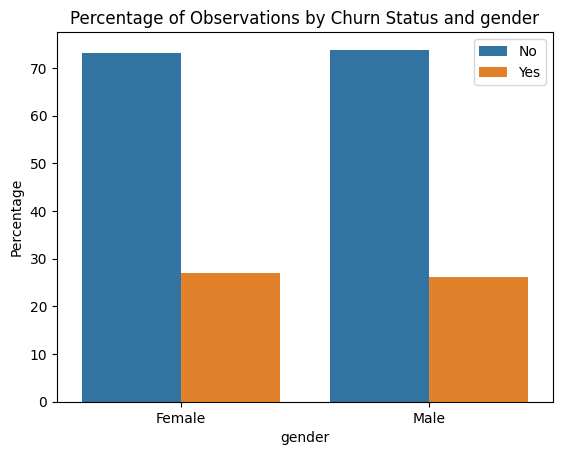

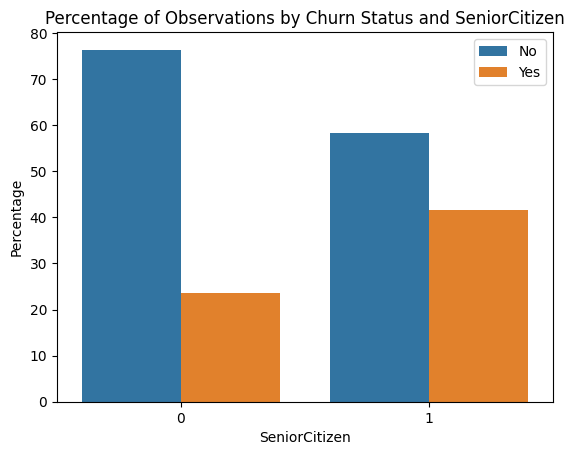

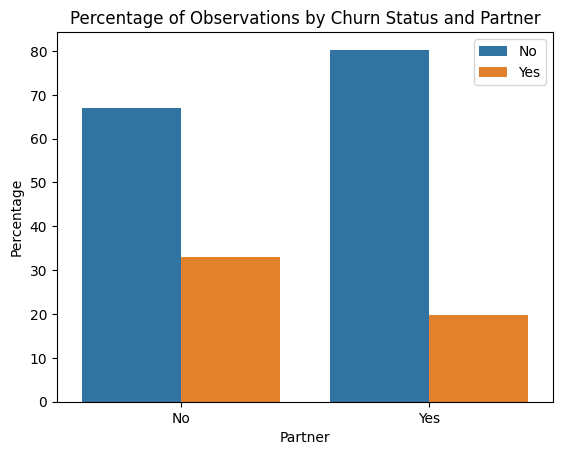

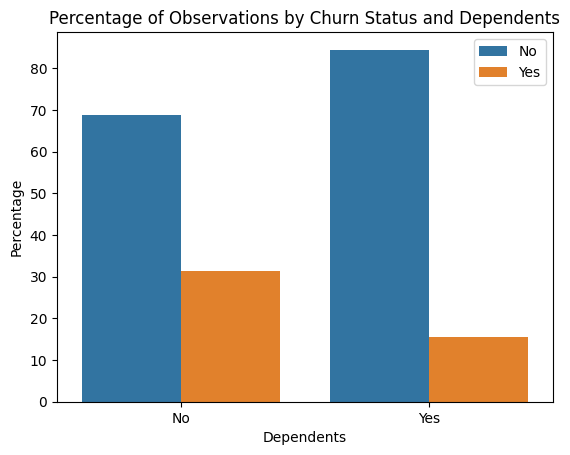

In [16]:
# Create a function to create a group percentage bar chart for each demographic attribute
def create_group_percentage_bar_chart(attribute):
    # Get the percentage of observations that correspond to each class of the response variable for each category of the independent variable
    churn_percentages = df.groupby(attribute)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

    # Create a bar plot
    sns.barplot(x=attribute, y='percentage', hue='Churn', data=churn_percentages)

    # Set the title and labels
    plt.title('Percentage of Observations by Churn Status and ' + attribute)
    plt.xlabel(attribute)
    plt.ylabel('Percentage')
    plt.legend()

    # Show the plot
    plt.show()

# Create group percentage bar charts for each demographic attribute
create_group_percentage_bar_chart('gender')
create_group_percentage_bar_chart('SeniorCitizen')
create_group_percentage_bar_chart('Partner')
create_group_percentage_bar_chart('Dependents')


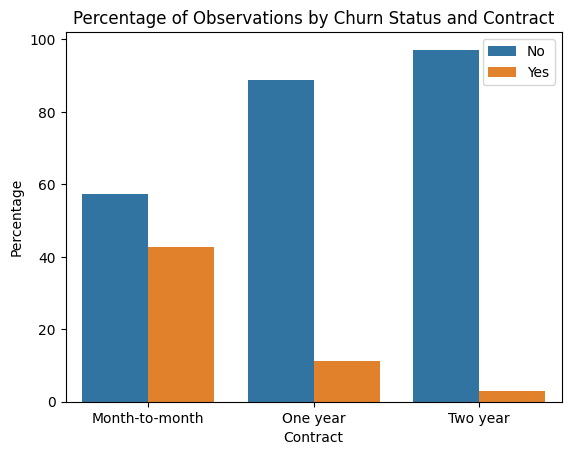

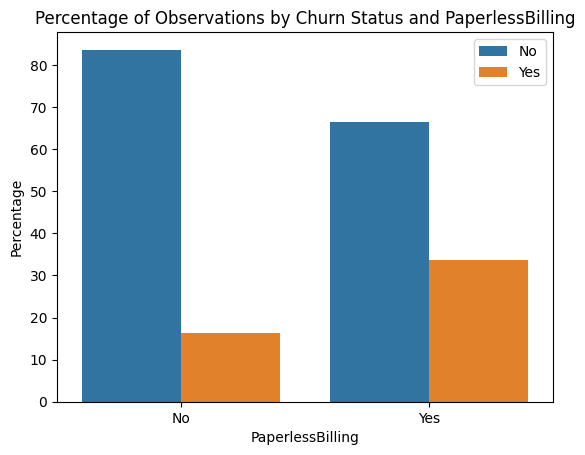

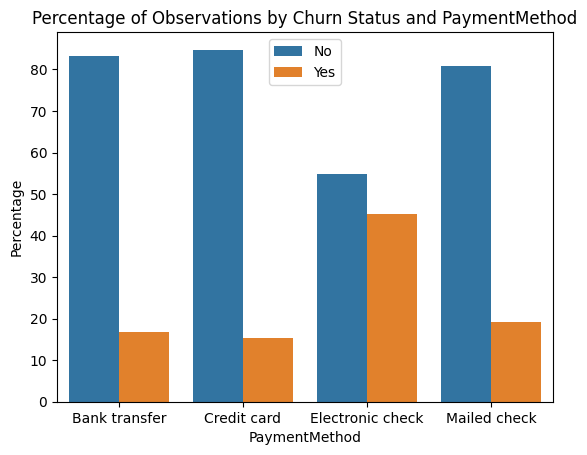

In [17]:
# Create a function to create a group percentage bar chart for each customer account information attribute
def create_group_percentage_bar_chart(attribute):
    # Get the percentage of observations that correspond to each class of the response variable for each category of the independent variable
    churn_percentages = df.groupby(attribute)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

    # Create a bar plot
    sns.barplot(x=attribute, y='percentage', hue='Churn', data=churn_percentages)

    # Set the title and labels
    plt.title('Percentage of Observations by Churn Status and ' + attribute)
    plt.xlabel(attribute)
    plt.ylabel('Percentage')
    plt.legend()

    # Show the plot
    plt.show()

# Create group percentage bar charts for each demographic attribute
create_group_percentage_bar_chart('Contract')
create_group_percentage_bar_chart('PaperlessBilling')
create_group_percentage_bar_chart('PaymentMethod')

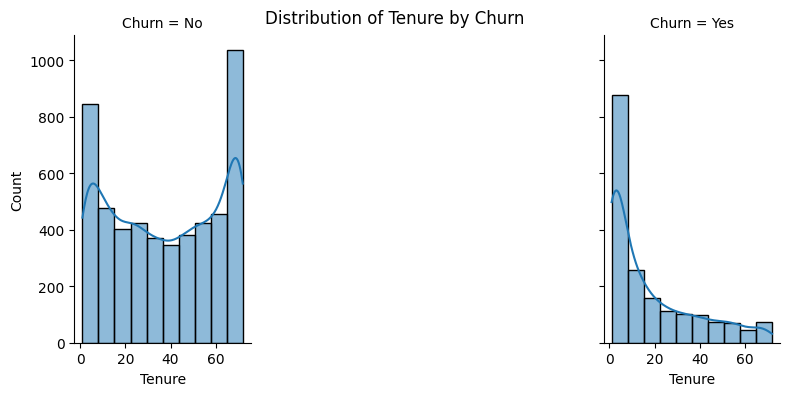

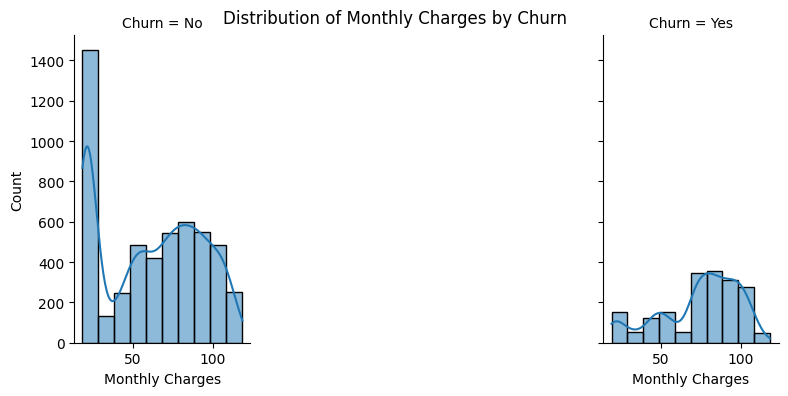

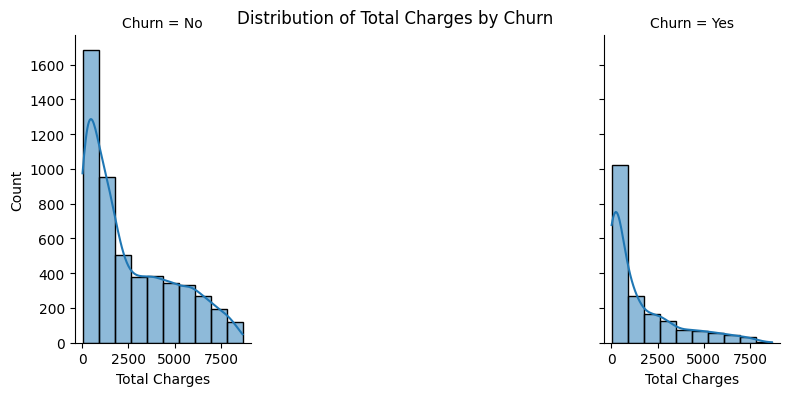

In [18]:
# Create a DataFrame with the numeric attributes and the Churn variable
df_numeric = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Create histograms for the numeric attributes by Churn
g = sns.FacetGrid(df_numeric, col='Churn', height=4)
g.map(sns.histplot, 'tenure', bins=10, kde=True)
g.set_axis_labels("Tenure", "Count")
g.fig.subplots_adjust(wspace=2, hspace=2)
g.fig.suptitle("Distribution of Tenure by Churn")
plt.show()

g = sns.FacetGrid(df_numeric, col='Churn', height=4)
g.map(sns.histplot, 'MonthlyCharges', bins=10, kde=True)
g.set_axis_labels("Monthly Charges", "Count")
g.fig.subplots_adjust(wspace=2, hspace=2)
g.fig.suptitle("Distribution of Monthly Charges by Churn")
plt.show()

g = sns.FacetGrid(df_numeric, col='Churn', height=4)
g.map(sns.histplot, 'TotalCharges', bins=10, kde=True)
g.set_axis_labels("Total Charges", "Count")
g.fig.subplots_adjust(wspace=2, hspace=2)
g.fig.suptitle("Distribution of Total Charges by Churn")
plt.show()

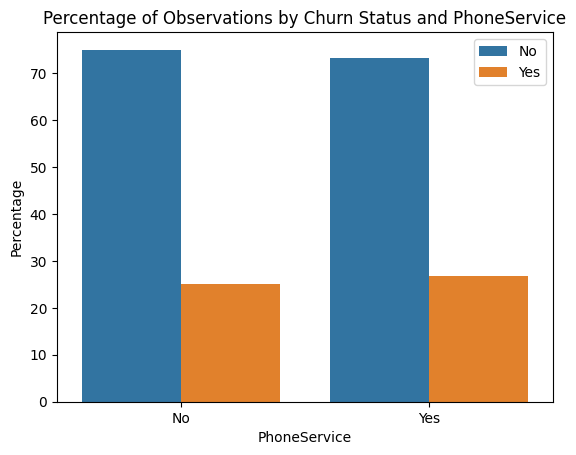

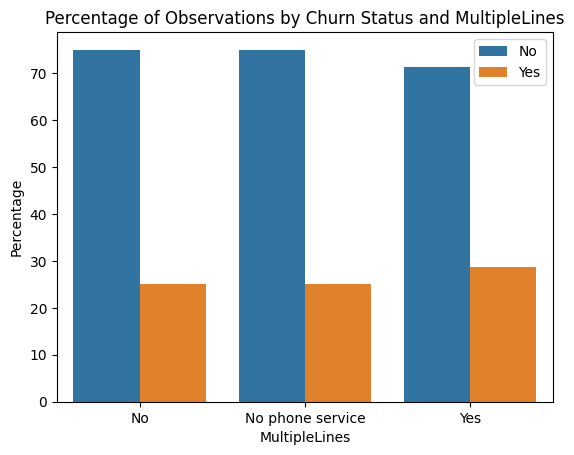

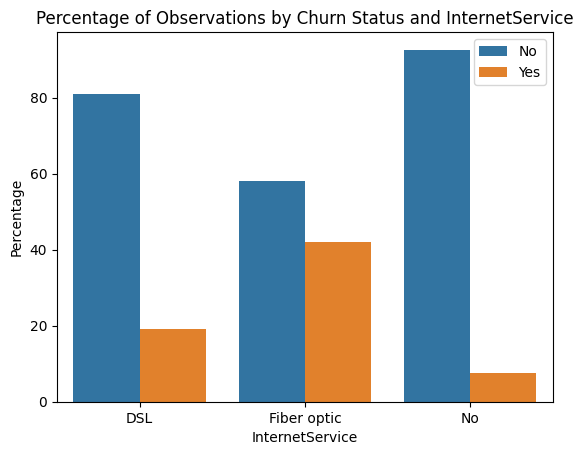

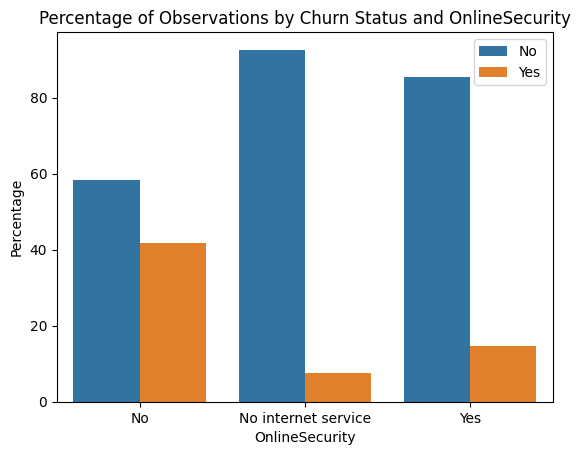

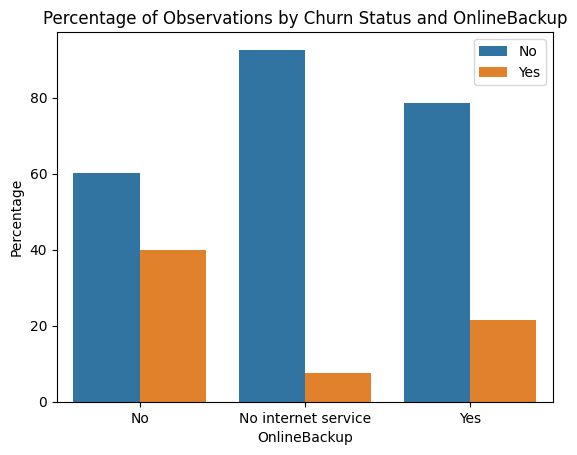

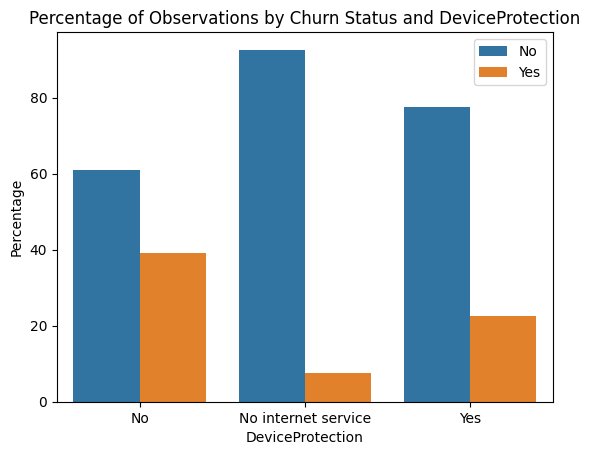

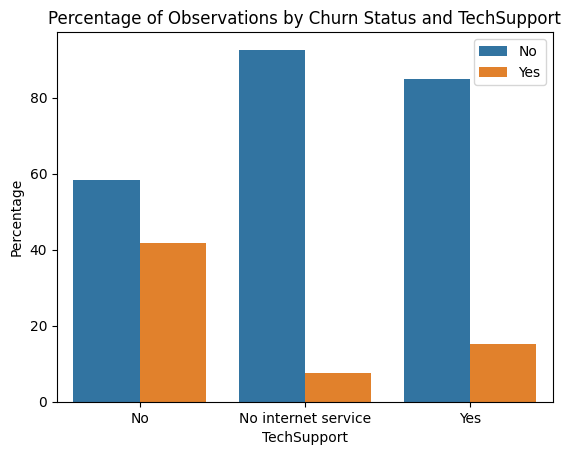

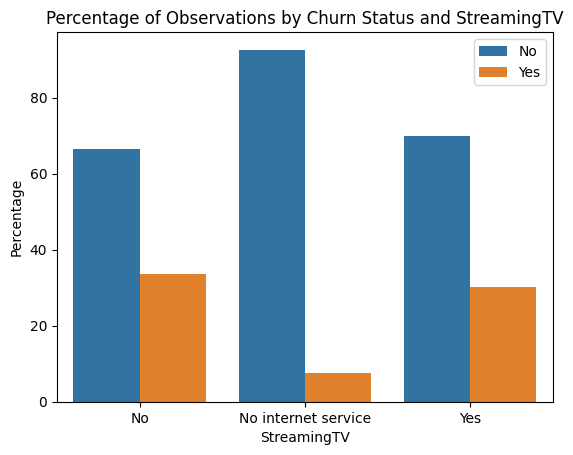

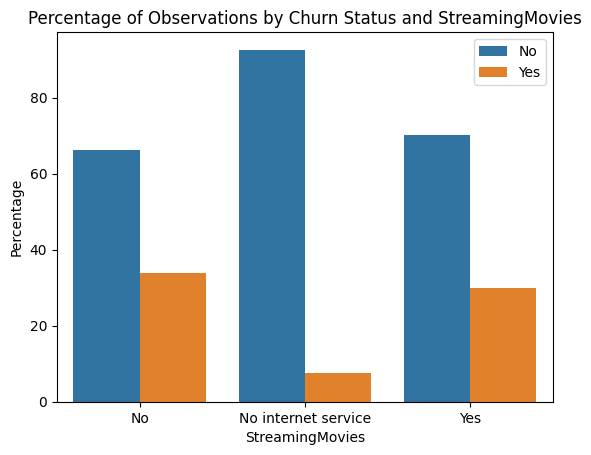

In [19]:
# Create a function to create a group percentage bar chart for each Service information attribute
def create_group_percentage_bar_chart(attribute):
    # Get the percentage of observations that correspond to each class of the response variable for each category of the independent variable
    churn_percentages = df.groupby(attribute)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

    # Create a bar plot
    sns.barplot(x=attribute, y='percentage', hue='Churn', data=churn_percentages)

    # Set the title and labels
    plt.title('Percentage of Observations by Churn Status and ' + attribute)
    plt.xlabel(attribute)
    plt.ylabel('Percentage')
    plt.legend()

    # Show the plot
    plt.show()

# Create group percentage bar charts for each demographic attribute
create_group_percentage_bar_chart('PhoneService')
create_group_percentage_bar_chart('MultipleLines')
create_group_percentage_bar_chart('InternetService')
create_group_percentage_bar_chart('OnlineSecurity')
create_group_percentage_bar_chart('OnlineBackup')
create_group_percentage_bar_chart('DeviceProtection')
create_group_percentage_bar_chart('TechSupport')
create_group_percentage_bar_chart('StreamingTV')
create_group_percentage_bar_chart('StreamingMovies')



In [20]:
#Feature Selection
#Checking which Features are Important
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
df_preprocessed = df.copy()

# Convert non-numeric columns to numeric columns
for col in df_preprocessed.columns:
    if df_preprocessed[col].dtype == 'object':
        le = LabelEncoder()
        df_preprocessed[col] = le.fit_transform(df_preprocessed[col])

# select categorical variables excluding the response variable
categorical_variables = df_preprocessed.select_dtypes(include='int64').drop(columns=['Churn'])

# compute the mutual information score between each categorical variable and the target
feature_importance = mutual_info_classif(categorical_variables, df_preprocessed['Churn'], discrete_features=True)
feature_importance = pd.Series(feature_importance, index=categorical_variables.columns).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)






Contract            0.098182
tenure              0.078950
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


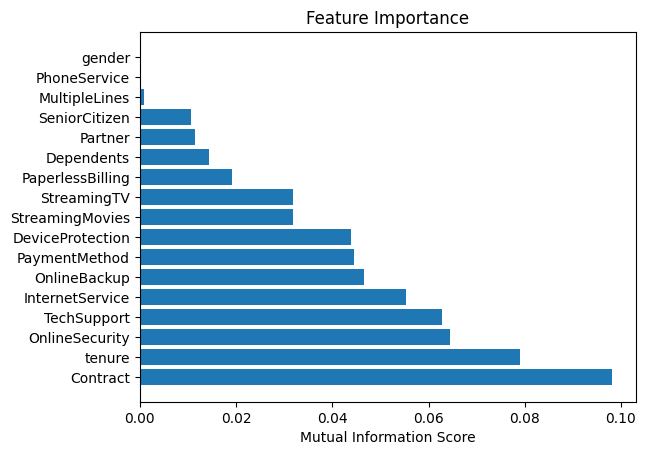

In [21]:
# Create a copy of the dataset
df_preprocessed = df.copy()

# Convert non-numeric columns to numeric columns
for col in df_preprocessed.columns:
    if df_preprocessed[col].dtype == 'object':
        le = LabelEncoder()
        df_preprocessed[col] = le.fit_transform(df_preprocessed[col])

# select categorical variables excluding the response variable
categorical_variables = df_preprocessed.select_dtypes(include='int64').drop(columns=['Churn'])

# compute the mutual information score between each categorical variable and the target
feature_importance = mutual_info_classif(categorical_variables, df_preprocessed['Churn'], discrete_features=True)
feature_importance = pd.Series(feature_importance, index=categorical_variables.columns).sort_values(ascending=False)

# visualize feature importance
plt.barh(range(len(feature_importance)), feature_importance)
plt.yticks(range(len(feature_importance)), feature_importance.index)
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance")
plt.show()

In [22]:
#Feature Engineering
#coverting categorical variables into numeric
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
df_transformed = df.copy()

# Encode the selected categorical features
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']
for col in label_encoding_columns:
    if df_transformed[col].dtype == 'object':
        le = LabelEncoder()
        df_transformed[col] = le.fit_transform(df_transformed[col])

# Show the encoded dataset
print(df_transformed.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1             

In [23]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)


In [24]:
print(df_transformed)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                    1           29.85     

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the dataset
df_normalized = df_transformed.copy()

# Apply Min-Max normalization to the selected columns
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df_normalized[min_max_columns] = scaler.fit_transform(df_normalized[min_max_columns])

# Show the normalized dataset
print(df_normalized.head())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1        0.115423      0.001275      0  ...   
1                 0        0.385075      0.215867      0  ...   
2                 1        0.354229      0.010310      1  ...   
3                 0        0.239303      0.210241      0  ...   
4                 1        0.521891      0.015330      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                         

In [26]:
# select independent variables
X = df_normalized.drop(columns='Churn')
# select dependent variables
y = df_normalized.loc[:, 'Churn']

print(X.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

In [27]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a list of classifiers to evaluate
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Train and evaluate each classifier
for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier's accuracy
    acc = accuracy_score(y_test, y_pred)

    # Print the classifier's name and accuracy
    print(clf.__class__.__name__, acc)


KNeighborsClassifier 0.7531285551763367
LogisticRegression 0.7923777019340159
SVC 0.7878270762229806
RandomForestClassifier 0.7667804323094426
GradientBoostingClassifier 0.7963594994311718


In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model
knn_params = {'n_neighbors': [3, 5, 7]}
lr_params = {'C': [0.1, 1, 10]}
svc_params = {'C': [0.1, 1, 10], 'gamma': [0.01,0.1, 1], 'kernel': ['linear', 'rbf']}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}

# Define the models to tune
models = [('KNeighborsClassifier', KNeighborsClassifier(), knn_params),
          ('LogisticRegression', LogisticRegression(), lr_params),
          ('SVC', SVC(), svc_params),
          ('RandomForestClassifier', RandomForestClassifier(), rf_params),
          ('GradientBoostingClassifier', GradientBoostingClassifier(), gb_params)]

# Loop through each model and perform hyperparameter tuning
for name, model, params in models:
    print(name)
    
    # Define the grid search object
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    
    # Perform the grid search
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and score
    print('Best parameters:', grid_search.best_params_)
    print('Test Accuracy:', grid_search.score(X_test, y_test))
    print('Mean validation accuracy:', grid_search.best_score_)
    print("---------------")


KNeighborsClassifier
Best parameters: {'n_neighbors': 7}
Test Accuracy: 0.7627986348122867
Mean validation accuracy: 0.771709848287274
---------------
LogisticRegression
Best parameters: {'C': 10}
Test Accuracy: 0.7957906712172924
Mean validation accuracy: 0.8064059282174879
---------------
SVC
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Test Accuracy: 0.7906712172923777
Mean validation accuracy: 0.8033731125839726
---------------
RandomForestClassifier
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Test Accuracy: 0.7866894197952219
Mean validation accuracy: 0.8060260618541866
---------------
GradientBoostingClassifier
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Test Accuracy: 0.7963594994311718
Mean validation accuracy: 0.8048889808178277
---------------
